In [1]:
#import zipfile
#with zipfile.ZipFile("/home/dsc/Downloads/CMAPSSData.zip", 'r') as zip_ref:
#    zip_ref.extractall("/home/dsc/Downloads/CMAPSSData")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Let's import the dataset containing the training database of the 1st round of unit engines.

In [18]:
df_train_1 = pd.read_csv('/home/dsc/Downloads/CMAPSSData/train_FD001.txt', sep=" ", header=None)

In [19]:
df_train_1.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


As we see, column names are not included, they are referenced as numbers. Helped by available bibliography we know the real names so we proceed to change them.
- First column is "ID" and it refers to the engine unit
- Second column is "Cycle" and it counts the cycle number where the engine is representing the data
- The next 3 columns are the "Operational Settings" and they refer to the flight conditions variation which affect the flight performance
- The last 23 columns refer the "Sensor Measurement" and show the value of the different physical conditions happening inside the engine during the flight cycle

In [20]:
df_train_1.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
           dtype='int64')

In [6]:
#df_train_1 = df_train_1.dropna(axis=1)

In [7]:
#df_train_1.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [21]:
list_units_1 = 3
operational_list = []
for n in range(1,list_units_1+1):
    operational = "operarional_setting_" + str(n)
    operational_list.append(operational)
 

In [22]:
list_units_2 = 23
sensor_measurement_list = []
for n in range(1,list_units_2+1):
    sensor = "sensor_measurement_" + str(n)
    sensor_measurement_list.append(sensor)
 

In [23]:
df_train_1.columns = ["ID", "Cycle"] + operational_list + sensor_measurement_list

In [24]:
df_train_1

,ID,Cycle,operarional_setting_1,operarional_setting_2,operarional_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,sensor_measurement_22,sensor_measurement_23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


In [28]:
df_train_1[["sensor_measurement_22","sensor_measurement_23"]].value_counts()

Series([], dtype: int64)

In [31]:
df_train_1["sensor_measurement_22"].nunique

<bound method IndexOpsMixin.nunique of 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
20626   NaN
20627   NaN
20628   NaN
20629   NaN
20630   NaN
Name: sensor_measurement_22, Length: 20631, dtype: float64>

Also, we see that the last two columns of sensor measurement are entirely NaN values, so we can discard them

In [32]:
df_train_1 = df_train_1.dropna(axis=1)
df_train_1.head()

,ID,Cycle,operarional_setting_1,operarional_setting_2,operarional_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


The variable which will provide the information of the current engine health is the Remaining Useful Life (RUL) which will be different for each engine unit and will decrease after each cycle performed.

This variable represents the number of cycles remaining until the end of life of the engine

In order to calculate we first need to determine the maximum number of cycles achieved by each unit, and then compute a decrease

In [33]:
max_cycle_dataset_1 = df_train_1.groupby(["ID"])["Cycle"].max().reset_index()
max_cycle_dataset_1 = max_cycle_dataset_1.rename(columns={"Cycle":"Max_cycle"})

In [34]:
max_cycle_dataset_1

,ID,Max_cycle
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269
...,...,...
95,96,336
96,97,202
97,98,156
98,99,185


We have determined now the maximum number of cycles per engine unit, and also the total number of engines contained in this dataset, 100 units

In [35]:
df_train_1 = df_train_1.merge(max_cycle_dataset_1, how="inner", on="ID")
df_train_1["RUL"] = df_train_1["Max_cycle"] - df_train_1["Cycle"]

In [36]:
df_train_1 = df_train_1.drop(["Max_cycle"],axis=1)

In [37]:
df_train_1.head()

,ID,Cycle,operarional_setting_1,operarional_setting_2,operarional_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


#### Let's have a check of the preliminary dataset to work with

Overall check to see if we still have some NaN values somewhere

In [56]:
df_train_1.isnull().sum()

ID                       0
Cycle                    0
operarional_setting_1    0
operarional_setting_2    0
operarional_setting_3    0
sensor_measurement_1     0
sensor_measurement_2     0
sensor_measurement_3     0
sensor_measurement_4     0
sensor_measurement_5     0
sensor_measurement_6     0
sensor_measurement_7     0
sensor_measurement_8     0
sensor_measurement_9     0
sensor_measurement_10    0
sensor_measurement_11    0
sensor_measurement_12    0
sensor_measurement_13    0
sensor_measurement_14    0
sensor_measurement_15    0
sensor_measurement_16    0
sensor_measurement_17    0
sensor_measurement_18    0
sensor_measurement_19    0
sensor_measurement_20    0
sensor_measurement_21    0
RUL                      0
dtype: int64

In [38]:
df_train_1.shape

(20631, 27)

The overal dataset comprises 27 diferent variables (26 independent and 1 dependent) and 20631 rows comprising feature values and cycles.

Let's see what are the average numbers of cycles numbers we're facing

In [44]:
df_train_1[["ID","Cycle"]].groupby("ID").max(["Cycle"]).sort_values(by='Cycle', ascending=False)

,Cycle
ID,
69,362
92,341
96,336
67,313
83,293
...,...
24,147
57,137
70,137


Average value for max cycles reached by engines:  206.31


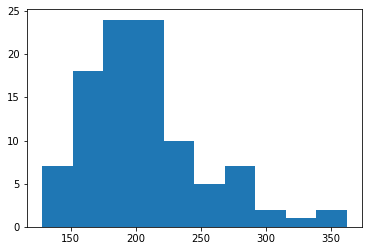

In [105]:
max_cycle_dataset_1 = df_train_1.groupby(["ID"])["Cycle"].max().reset_index()
max_cycle_dataset_1 = max_cycle_dataset_1.rename(columns={"Cycle":"Max_cycle"})
plt.hist(max_cycle_dataset_1["Max_cycle"])
print("Average value for max cycles reached by engines: ", max_cycle_dataset_1["Max_cycle"].mean())

We have recovered for this step the max_cycle_dataset to visualize the distribution of the maximum cycle reached by this set of engines, as well as the average value: 206 cycles

Let's now have a check in the dependant variable, the RUL

Text(0, 0.5, 'Max Cycle')

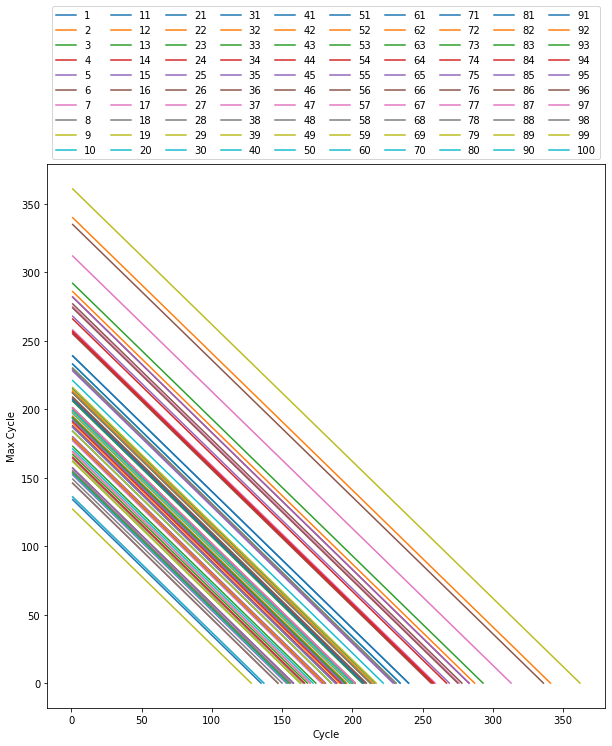

In [106]:
df_RUL_engine_1 = df_train_1[["ID","Cycle","RUL"]]
df_RUL_engine_1 = df_RUL_engine_1.pivot(index='Cycle', columns='ID', values='RUL')

df_RUL_engine_1.plot(figsize=(10, 10))
plt.legend(bbox_to_anchor=(0,1,1,1), loc=3,
       ncol=10, mode="expand")
plt.ylabel("Max Cycle")

We have above a representation of how the engine life for each engine decreases from the cycle 0, where the RUL is maximum, until it reaches RUL = 0 at maximum cycle

#### Let's have a look at the operational settings

In [114]:
df_1_opst_1 = df_train_1[["ID","Cycle","operarional_setting_1"]]
df_1_opst_2 = df_train_1[["ID","Cycle","operarional_setting_2"]]
df_1_opst_3 = df_train_1[["ID","Cycle","operarional_setting_3"]]

df_1_opst_1 = df_1_opst_1.pivot(index='Cycle', columns='ID', values='operarional_setting_1')
df_1_opst_2 = df_1_opst_2.pivot(index='Cycle', columns='ID', values='operarional_setting_2')
df_1_opst_3 = df_1_opst_3.pivot(index='Cycle', columns='ID', values='operarional_setting_3')

Operational setting 1 behavior during cycle evolution per engine unit

Maximum value for operational setting 1:  0.0087 
 Minimum value for operational setting 1:  -0.0087 
 Average value for operational setting 1:  -8.870146866366216e-06


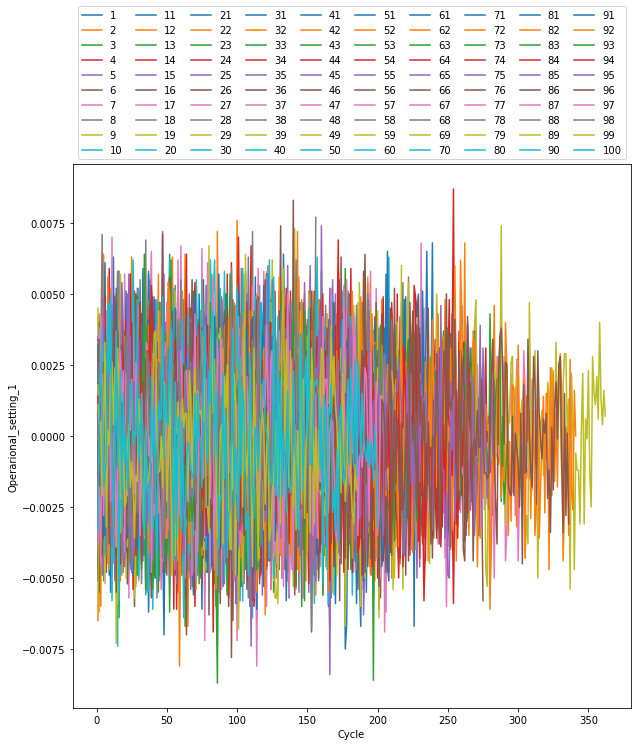

In [126]:
df_1_opst_1.plot(figsize=(10, 10))
plt.legend(bbox_to_anchor=(0,1,1,1), loc=3,
       ncol=10, mode="expand")
plt.ylabel("Operarional_setting_1")

print("Maximum value for operational setting 1: ", df_train_1["operarional_setting_1"].max(),"\n",
     "Minimum value for operational setting 1: " , df_train_1["operarional_setting_1"].min(),"\n",
     "Average value for operational setting 1: " , df_train_1["operarional_setting_1"].mean())

Operational setting 2 behavior during cycle evolution per engine unit

Maximum value for operational setting 2:  0.0006 
 Minimum value for operational setting 2:  -0.0006 
 Average value for operational setting 2:  2.350831273326574e-06


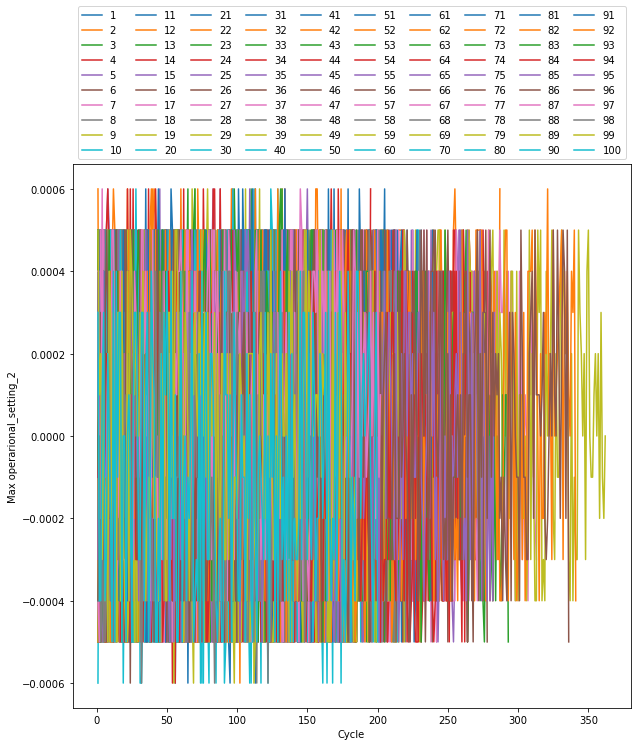

In [128]:
df_1_opst_2.plot(figsize=(10, 10))
plt.legend(bbox_to_anchor=(0,1,1,1), loc=3,
       ncol=10, mode="expand")
plt.ylabel("Max operarional_setting_2")

print("Maximum value for operational setting 2: ", df_train_1["operarional_setting_2"].max(),"\n",
     "Minimum value for operational setting 2: " , df_train_1["operarional_setting_2"].min(),"\n",
     "Average value for operational setting 2: " , df_train_1["operarional_setting_2"].mean())

Operational setting 3 behavior during cycle evolution per engine unit

Maximum value for operational setting 3:  100.0 
 Minimum value for operational setting 3:  100.0 
 Average value for operational setting 3:  100.0


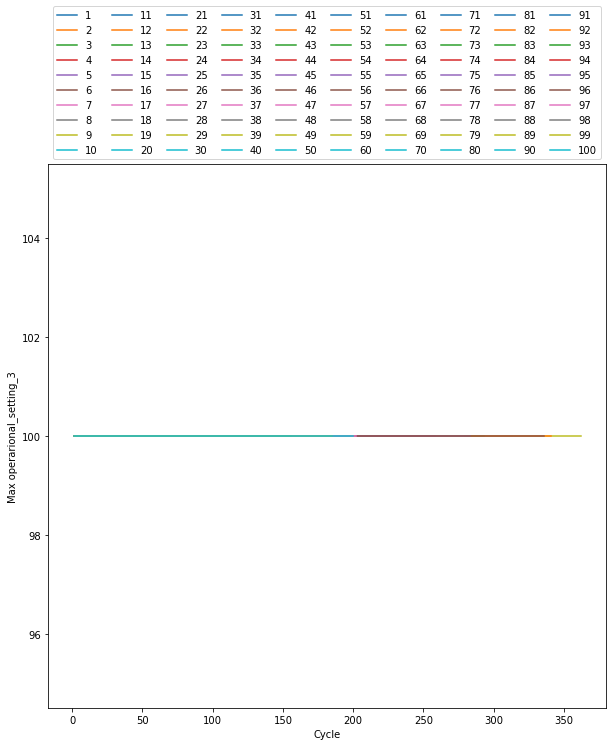

In [129]:
df_1_opst_3.plot(figsize=(10, 10))
plt.legend(bbox_to_anchor=(0,1,1,1), loc=3,
       ncol=10, mode="expand")
plt.ylabel("Max operarional_setting_3")

print("Maximum value for operational setting 3: ", df_train_1["operarional_setting_3"].max(),"\n",
     "Minimum value for operational setting 3: " , df_train_1["operarional_setting_3"].min(),"\n",
     "Average value for operational setting 3: " , df_train_1["operarional_setting_3"].mean())

In [131]:
df_train_1.groupby("ID")["operarional_setting_3"].std()

ID
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
      ... 
96     0.0
97     0.0
98     0.0
99     0.0
100    0.0
Name: operarional_setting_3, Length: 100, dtype: float64

Operational setting seems to hace no changes, so we can discard it from the dataset

In [133]:
df_train_1.drop(columns="operarional_setting_3",axis=1, inplace=True)

In [134]:
df_train_1

,ID,Cycle,operarional_setting_1,operarional_setting_2,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,sensor_measurement_6,...,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,RUL
0,1,1,-0.0007,-0.0004,518.67,641.82,1589.70,1400.60,14.62,21.61,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,518.67,642.15,1591.82,1403.14,14.62,21.61,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,518.67,642.35,1587.99,1404.20,14.62,21.61,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,518.67,642.35,1582.79,1401.87,14.62,21.61,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,518.67,642.37,1582.85,1406.22,14.62,21.61,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,518.67,643.49,1597.98,1428.63,14.62,21.61,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,518.67,643.54,1604.50,1433.58,14.62,21.61,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,518.67,643.42,1602.46,1428.18,14.62,21.61,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,518.67,643.23,1605.26,1426.53,14.62,21.61,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


AttributeError: 'Figure' object has no attribute 'ravel'

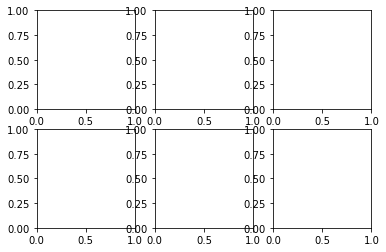

In [144]:
units = np.arange(0,5)
ax, fig = plt.subplots(nrows=2, ncols=3)


ax = ax.ravel()
for n in range(0,6):
    df = df_train_1[df_train_1["ID"] == n+1]
    df.plot(kind="line",ax=ax[n])
    plt.plot(df["operarional_setting_1"])

In [ ]:
import seaborn as sns
sns.FacetGrid(data=df_train_1, col="Condition", hue='ID'

TypeError: 'Figure' object is not subscriptable

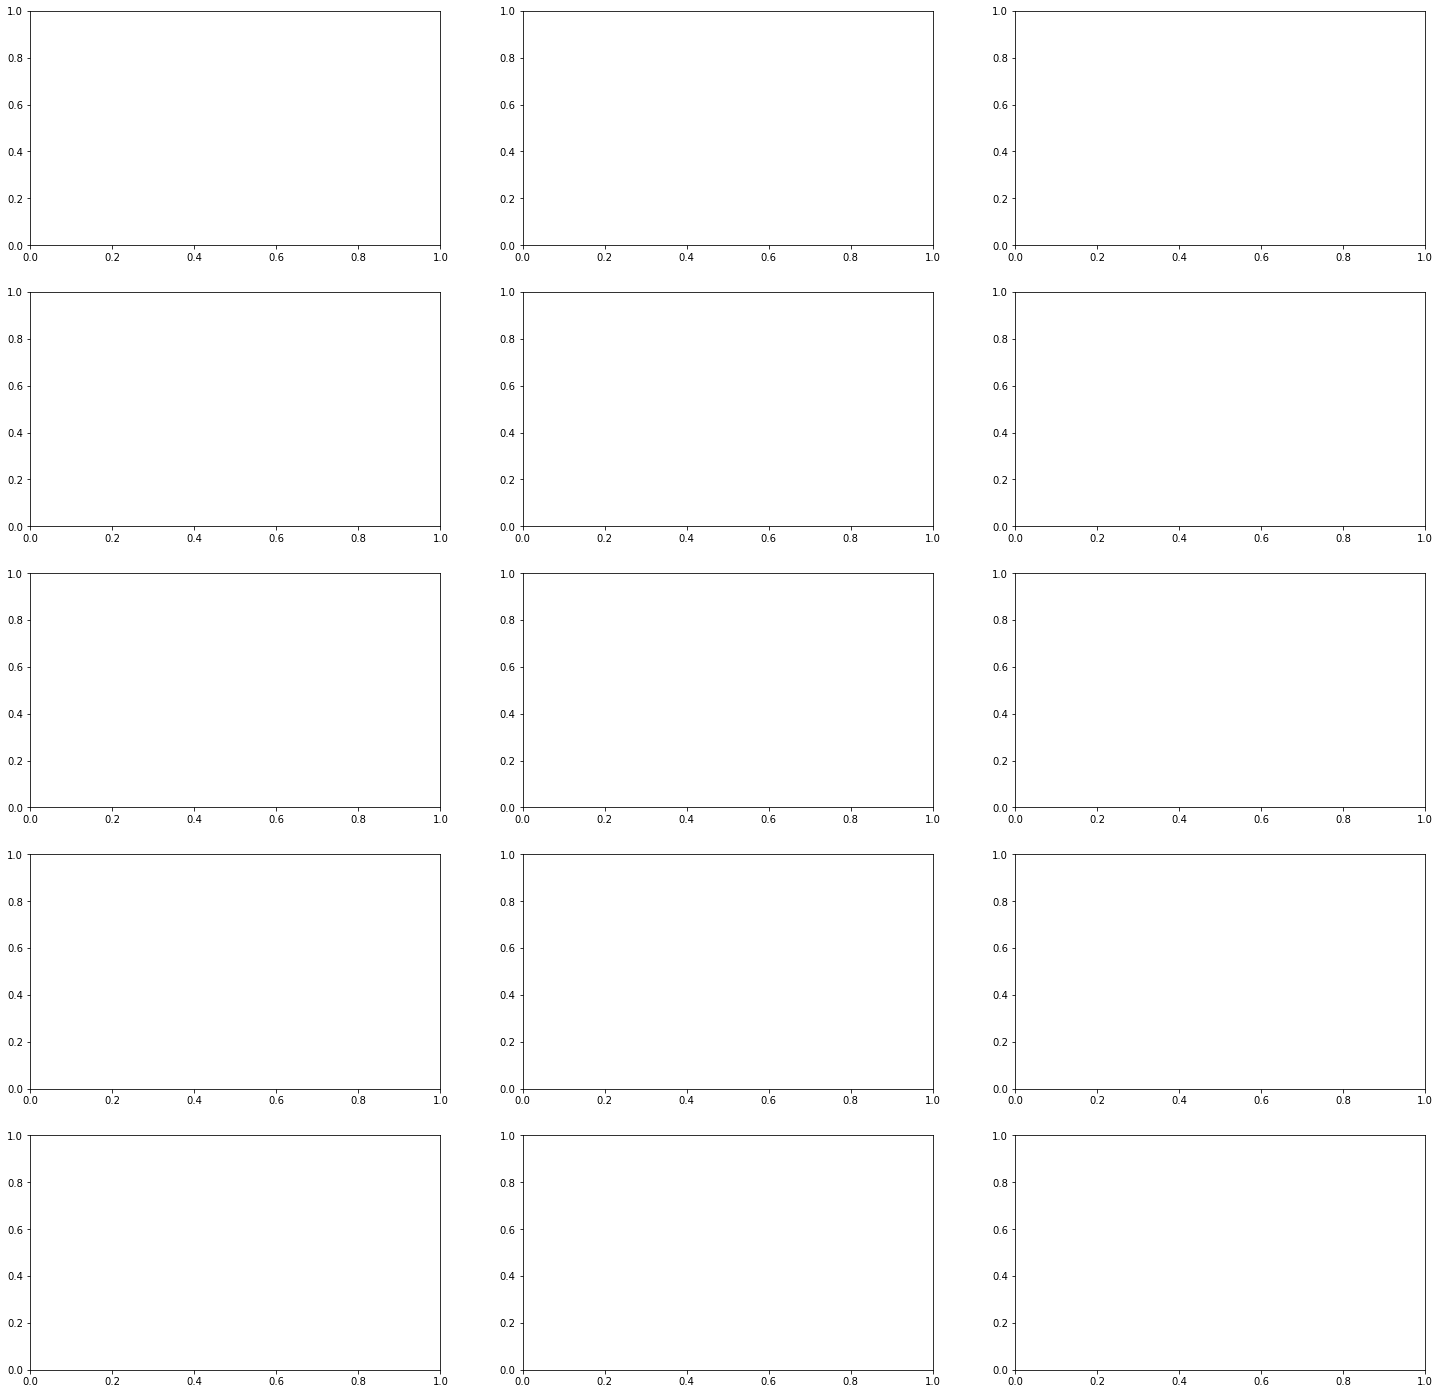

In [146]:
fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (25,25))

for i in range(0,15):
    temp = df_train_1.operarional_setting_1[df_train_1.ID == i+1].reset_index(drop = True).rolling(window = 5).mean()
    #temp.plot(kind = "line", ax = ax[i])
    ax[i].set_title('Unit'+str(i+1))
    ax[i].set_xlabel("Cycle")

In [19]:
X_1 = df1[df1["ID"]==1]

In [20]:
X_1 = X_1.drop(["ID"], axis=1)

In [21]:
X_1

,Cycle,operarional_setting_1,operarional_setting_2,operarional_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,sensor_measurement_6,...,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,RUL
0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,21.61,...,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588,4
188,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,21.61,...,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127,3
189,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,21.61,...,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675,2
190,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,21.61,...,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295,1


In [19]:
X = X_1[X_1.columns[:-1]]

In [25]:
y=X_1.iloc[:,-1].values

In [20]:
y = X_1[X_1.columns[-1:]]

In [26]:
y

array([191, 190, 189, 188, 187, 186, 185, 184, 183, 182, 181, 180, 179,
       178, 177, 176, 175, 174, 173, 172, 171, 170, 169, 168, 167, 166,
       165, 164, 163, 162, 161, 160, 159, 158, 157, 156, 155, 154, 153,
       152, 151, 150, 149, 148, 147, 146, 145, 144, 143, 142, 141, 140,
       139, 138, 137, 136, 135, 134, 133, 132, 131, 130, 129, 128, 127,
       126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114,
       113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101,
       100,  99,  98,  97,  96,  95,  94,  93,  92,  91,  90,  89,  88,
        87,  86,  85,  84,  83,  82,  81,  80,  79,  78,  77,  76,  75,
        74,  73,  72,  71,  70,  69,  68,  67,  66,  65,  64,  63,  62,
        61,  60,  59,  58,  57,  56,  55,  54,  53,  52,  51,  50,  49,
        48,  47,  46,  45,  44,  43,  42,  41,  40,  39,  38,  37,  36,
        35,  34,  33,  32,  31,  30,  29,  28,  27,  26,  25,  24,  23,
        22,  21,  20,  19,  18,  17,  16,  15,  14,  13,  12,  1

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [28]:
X.shape , y.shape

((192, 25), (192,))

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

lr = LinearRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

In [39]:
print(mean_absolute_error(y_test, preds),
      mean_squared_error(y_test, preds),
      explained_variance_score(y_test, preds))

3.2566542055671256e-14 1.4809548727349128e-27 1.0


In [22]:
#df1_corr = df1.drop(["ID"], axis=1)
corr = X_1.corr()
corr

,Cycle,operarional_setting_1,operarional_setting_2,operarional_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,sensor_measurement_6,...,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,RUL
Cycle,1.000000,-3.884768e-02,1.249959e-02,NaN,0.000000e+00,6.933281e-01,5.834194e-01,8.240791e-01,0.000000e+00,0.000000e+00,...,8.327319e-01,-7.131536e-01,7.238052e-01,0.000000e+00,6.857184e-01,NaN,NaN,-7.298564e-01,-7.633442e-01,-1.000000
operarional_setting_1,-0.038848,1.000000e+00,-9.819150e-02,NaN,-2.318630e-18,-1.178853e-01,-6.424258e-02,-1.202364e-01,-1.203181e-17,5.986281e-17,...,-1.299955e-01,1.546102e-01,-8.398133e-02,-4.869123e-17,-1.089644e-01,NaN,NaN,1.026648e-01,7.221062e-02,0.038848
operarional_setting_2,0.012500,-9.819150e-02,1.000000e+00,NaN,-8.858366e-17,-2.959971e-03,8.844666e-03,-1.500111e-02,-7.675745e-17,1.079414e-16,...,-4.934473e-02,-4.908604e-02,6.076079e-02,7.521255e-17,-3.063662e-03,NaN,NaN,4.270554e-02,-1.268866e-02,-0.012500
operarional_setting_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sensor_measurement_1,0.000000,-2.318630e-18,-8.858366e-17,NaN,1.000000e+00,2.317129e-14,-4.102234e-14,-8.982342e-14,1.000000e+00,-1.000000e+00,...,3.196663e-11,4.661293e-13,7.312191e-14,-1.000000e+00,-1.287379e-14,NaN,NaN,-1.675259e-13,-1.059098e-15,0.000000
sensor_measurement_2,0.693328,-1.178853e-01,-2.959971e-03,NaN,2.317129e-14,1.000000e+00,5.339928e-01,7.152692e-01,2.330313e-14,-2.317129e-14,...,6.931270e-01,-6.503204e-01,6.373583e-01,-2.317129e-14,6.482267e-01,NaN,NaN,-6.886841e-01,-6.749360e-01,-0.693328
sensor_measurement_3,0.583419,-6.424258e-02,8.844666e-03,NaN,-4.102234e-14,5.339928e-01,1.000000e+00,6.004077e-01,-4.092205e-14,4.098486e-14,...,6.134391e-01,-5.932470e-01,5.447426e-01,4.102234e-14,5.463255e-01,NaN,NaN,-4.705414e-01,-5.835460e-01,-0.583419
sensor_measurement_4,0.824079,-1.202364e-01,-1.500111e-02,NaN,-8.982342e-14,7.152692e-01,6.004077e-01,1.000000e+00,-8.978971e-14,8.972261e-14,...,8.189319e-01,-7.572098e-01,7.278860e-01,8.993432e-14,6.911859e-01,NaN,NaN,-7.224158e-01,-7.445281e-01,-0.824079
sensor_measurement_5,0.000000,-1.203181e-17,-7.675745e-17,NaN,1.000000e+00,2.330313e-14,-4.092205e-14,-8.978971e-14,1.000000e+00,-1.000000e+00,...,3.196663e-11,4.662677e-13,7.329823e-14,-1.000000e+00,-1.380344e-14,NaN,NaN,-1.676099e-13,-1.049556e-15,0.000000
sensor_measurement_6,0.000000,5.986281e-17,1.079414e-16,NaN,-1.000000e+00,-2.317129e-14,4.098486e-14,8.972261e-14,-1.000000e+00,1.000000e+00,...,-3.196663e-11,-4.661293e-13,-7.304778e-14,1.000000e+00,1.067939e-14,NaN,NaN,1.673441e-13,9.467693e-16,0.000000


In [ ]:
#df1_ID1 = df1_filtered[df1_filtered["ID"]==1]

In [23]:
corr.style.background_gradient(cmap="coolwarm", vmin=-1, vmax=1).set_precision(2)

,Cycle,operarional_setting_1,operarional_setting_2,operarional_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,sensor_measurement_6,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_10,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,RUL
Cycle,1.00,-0.04,0.01,nan,0.00,0.69,0.58,0.82,0.00,0.00,-0.80,0.81,-0.44,0.00,0.84,-0.84,0.83,-0.71,0.72,0.00,0.69,nan,nan,-0.73,-0.76,-1.00
operarional_setting_1,-0.04,1.00,-0.10,nan,-0.00,-0.12,-0.06,-0.12,-0.00,0.00,0.10,-0.16,0.06,-0.00,-0.07,0.10,-0.13,0.15,-0.08,-0.00,-0.11,nan,nan,0.10,0.07,0.04
operarional_setting_2,0.01,-0.10,1.00,nan,-0.00,-0.00,0.01,-0.02,-0.00,0.00,0.01,-0.01,0.03,0.00,-0.03,0.08,-0.05,-0.05,0.06,0.00,-0.00,nan,nan,0.04,-0.01,-0.01
operarional_setting_3,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
sensor_measurement_1,0.00,-0.00,-0.00,nan,1.00,0.00,-0.00,-0.00,1.00,-1.00,-0.00,0.00,0.00,-1.00,-0.00,-0.00,0.00,0.00,0.00,-1.00,-0.00,nan,nan,-0.00,-0.00,0.00
sensor_measurement_2,0.69,-0.12,-0.00,nan,0.00,1.00,0.53,0.72,0.00,-0.00,-0.69,0.73,-0.38,-0.00,0.71,-0.71,0.69,-0.65,0.64,-0.00,0.65,nan,nan,-0.69,-0.67,-0.69
sensor_measurement_3,0.58,-0.06,0.01,nan,-0.00,0.53,1.00,0.60,-0.00,0.00,-0.61,0.62,-0.34,0.00,0.65,-0.63,0.61,-0.59,0.54,0.00,0.55,nan,nan,-0.47,-0.58,-0.58
sensor_measurement_4,0.82,-0.12,-0.02,nan,-0.00,0.72,0.60,1.00,-0.00,0.00,-0.80,0.81,-0.43,0.00,0.82,-0.84,0.82,-0.76,0.73,0.00,0.69,nan,nan,-0.72,-0.74,-0.82
sensor_measurement_5,0.00,-0.00,-0.00,nan,1.00,0.00,-0.00,-0.00,1.00,-1.00,-0.00,0.00,0.00,-1.00,-0.00,-0.00,0.00,0.00,0.00,-1.00,-0.00,nan,nan,-0.00,-0.00,0.00
sensor_measurement_6,0.00,0.00,0.00,nan,-1.00,-0.00,0.00,0.00,-1.00,1.00,0.00,-0.00,-0.00,1.00,0.00,0.00,-0.00,-0.00,-0.00,1.00,0.00,nan,nan,0.00,0.00,0.00


In [24]:
delete_columns = []

for col in X_1.columns:
    corr = X_1[col].corr(X_1["RUL"])
    print(col,"------->",corr)
    if abs(corr) > 0.5:
        pass
    else:
        delete_columns.append(col)

Cycle -------> -1.0
operarional_setting_1 -------> 0.03884767768866156
operarional_setting_2 -------> -0.01249959248423904
operarional_setting_3 -------> nan
sensor_measurement_1 -------> nan
sensor_measurement_2 -------> -0.6933280681010473
sensor_measurement_3 -------> -0.5834193788072777
sensor_measurement_4 -------> -0.8240790912092306
sensor_measurement_5 -------> 0.0
sensor_measurement_6 -------> 0.0
sensor_measurement_7 -------> 0.7985443147850023
sensor_measurement_8 -------> -0.805492361938452
sensor_measurement_9 -------> 0.4423250583463298
sensor_measurement_10 -------> 0.0
sensor_measurement_11 -------> -0.842075086788962
sensor_measurement_12 -------> 0.8385861675508782
sensor_measurement_13 -------> -0.8327318728051495
sensor_measurement_14 -------> 0.7131536104152847
sensor_measurement_15 -------> -0.7238052178901577
sensor_measurement_16 -------> 0.0
sensor_measurement_17 -------> -0.685718379281616
sensor_measurement_18 -------> nan
sensor_measurement_19 -------> nan
s

In [25]:
delete_columns

['operarional_setting_1',
 'operarional_setting_2',
 'operarional_setting_3',
 'sensor_measurement_1',
 'sensor_measurement_5',
 'sensor_measurement_6',
 'sensor_measurement_9',
 'sensor_measurement_10',
 'sensor_measurement_16',
 'sensor_measurement_18',
 'sensor_measurement_19']

In [27]:
df1_filtered = X_1.drop(delete_columns, axis=1)

In [28]:
df1_filtered

,Cycle,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_7,sensor_measurement_8,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_17,sensor_measurement_20,sensor_measurement_21,RUL
0,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,2,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,3,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,4,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,5,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,188,643.75,1602.38,1422.78,551.94,2388.31,48.00,519.79,2388.23,8117.69,8.5207,396,38.51,22.9588,4
188,189,644.18,1596.17,1428.01,550.70,2388.27,48.08,519.58,2388.33,8117.51,8.5183,395,38.48,23.1127,3
189,190,643.64,1599.22,1425.95,551.29,2388.29,48.33,520.04,2388.35,8112.58,8.5223,398,38.49,23.0675,2
190,191,643.34,1602.36,1425.77,550.92,2388.28,48.15,519.57,2388.30,8114.61,8.5174,394,38.45,23.1295,1


In [29]:
df1_filtered.to_csv("filtered_Train_001.csv", index=None)

In [45]:
X = df1_filtered.iloc[:,:-1]
y = df1_filtered.iloc[:,-1]

In [46]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [55]:
regressor = RandomForestRegressor()

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [60]:
y_test, y_pred

(153    38
 154    37
 155    36
 156    35
 157    34
 158    33
 159    32
 160    31
 161    30
 162    29
 163    28
 164    27
 165    26
 166    25
 167    24
 168    23
 169    22
 170    21
 171    20
 172    19
 173    18
 174    17
 175    16
 176    15
 177    14
 178    13
 179    12
 180    11
 181    10
 182     9
 183     8
 184     7
 185     6
 186     5
 187     4
 188     3
 189     2
 190     1
 191     0
 Name: RUL, dtype: int64,
 array([41.28, 41.84, 42.6 , 41.7 , 42.31, 41.53, 41.12, 41.22, 40.27,
        41.02, 40.81, 41.9 , 40.63, 41.13, 41.66, 40.45, 40.62, 41.05,
        41.  , 40.56, 40.91, 40.87, 40.96, 40.65, 40.55, 40.37, 40.89,
        40.63, 40.68, 40.64, 40.64, 40.64, 40.62, 40.6 , 40.64, 40.64,
        40.64, 40.64, 40.64]))

In [62]:
def give_Train_engine(Train_no,engine_id):
    "Train_no, is the Sl.no of Train-set"
    "engine_id, is the ID of engine"
    import pandas as pd
    import numpy as np
    df=df1_no_ID
    train = df[df['ID']==engine_id]
    train = train.drop(columns=['ID'])
    X_train=train.iloc[:,:-1]
    y_train=train.iloc[:,-1]
    return X_train,y_train

In [64]:
df=df1_no_ID

In [65]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

In [67]:
regressor = RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [71]:
from sklearn.metrics import *

In [72]:
y_pred = regressor.predict(X_test)
print('RMSE on Test set:', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE on Test set: 49.302485143380984


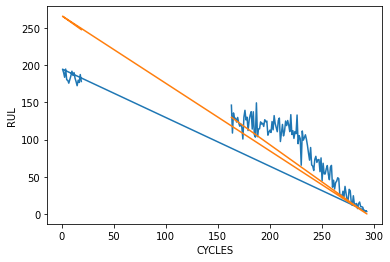

In [73]:
a,b=250,400
rang = list(range(a,b))
plt.plot(np.array(X_test)[rang,0],y_pred[rang])
plt.plot(np.array(X_test)[rang,0],np.array(y_test)[rang])

plt.ylabel('RUL')
plt.xlabel('CYCLES')
plt.show()